In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
eps=0.001
funk=0
alif=1
infinity=10000
def roz(x):
  global funk
  funk+=1
  return alif*(x[0]**2-x[1])**2+(x[0]-1)**2
def g(x):
  return (3*(x[0]**2))/4 + 5*x[0]/4-x[1]-2

def gold(epsg,point,f,antigr,r,g,roz):
    a=5
    b=-5
    delt=(b-a)*(math.sqrt(5)-2)/2
    x1=(a+b)/2 -delt
    x2=(a+b)/2 +delt
    f1=f(point + x1 * antigr,r,g,roz)
    f2=f(point + x2 * antigr,r,g,roz)
    while(math.fabs(b-a)>=epsg):
        if(f1<f2):
            b=x2
            x2=x1
            x1=a+b-x2
            f2=f1
            f1=f(point + x1 * antigr,r,g,roz)
        else:
            a=x1
            x1=x2
            x2=a+b-x1
            f1=f2
            f2=f(point + x2 * antigr,r,g,roz)
        delt=(b-a)*(math.sqrt(5)-2)/2
    return (a+b)/2


def norm(x):
    nor=0
    for i in range(2):
        nor +=x[i]*x[i]
    return math.sqrt(nor)
def rozen(x0,f,r,g,roz):
  k=0
  e1=np.array([1,0])
  e2=np.array([0,1])
  cappa1=gold(eps/100,x0,f,e1,r,g,roz)
  cappa2=gold(eps/100,x0+ cappa1*e1,f,e2,r,g,roz)
  x=x0+cappa1*e1+cappa2*e2
  #unsv3.append(x)
  ek1=cappa1*e1+cappa2*e2
  ek2 = e2 - (np.dot(e2, ek1)/ np.dot(ek1, ek1)) * ek1;
  while( norm(x-x0)>0.0000001 or k<4):#abs(f(x)-f(x0))>eps or
    k+=1
    x0=x
    e1=ek1
    e2=ek2
    cappa1=gold(eps,x0 ,f,e1,r,g,roz)
    cappa2=gold(eps,x0+ cappa1*e1,f,e2,r,g,roz)
    x=x0+cappa1*e1+cappa2*e2
    #unsv3.append(x)
    ek1=cappa1*e1+cappa2*e2
    ek2 = e2 - (np.dot(e2, ek1)/ np.dot(ek1, ek1)) * ek1;
    if(k>100):
      break
  #print(k)
  return x


def vnesh(x,r,g,roz):
  #global g(x)
  if(g(x)<=0):
    return roz(x)
  else:
    g=max(0,g(x))
    return roz(x)+r*g*g
def vnutr1(x,r,g,roz):
  g=g(x)
  if(g<0):
    return roz(x)-r*1/g
  else:
    return roz(x)+infinity
def vnutr2(x,r,g,roz):
  g=g(x)
  if(g<0):
    return roz(x)-r*math.log(-g)
  else:
    return roz(x)+infinity
def vneshm(f,x0,r,g,roz):
  global unsv1
  unsv1.append(x0)
  k=0
  x=f(x0,vnesh,r,g,roz)
  unsv1.append(x)
  while(abs(roz(x)-roz(x0))>eps or k<5):
    k+=1
    x0=x
    x=f(x0,vnesh,r,g,roz)
    unsv1.append(x)
    r*=100
    if(k>10):
      break
  print(k)
  print(g(x))
  return x
def vnutrm1(f,x0,r,g,roz):
  global unsv2
  unsv2.append(x0)
  k=0
  x=f(x0,vnutr1,r,g,roz)
  unsv2.append(x)
  while(norm(x-x0)>eps or k<3):#abs(roz(x)-roz(x0))>eps
    k+=1
    x0=x
    x=f(x0,vnutr1,r,g,roz)
    unsv2.append(x)
    r*=0.1
  print(k)
  return x
def vnutrm2(f,x0,r,g,roz):
  k=0
  x=f(x0,vnutr2,r,g,roz)
  while(abs(roz(x)-roz(x0))>eps or k<5):
    x0=x
    x=f(x0,vnutr2,r,g,roz)
    r*=0.1
    k+=1
  print(k)
  return x

x0=np.array([-1,-2])
unsv1=[]
unsv2=[]
print(vneshm(rozen,x0,1,g,roz))
print(funk)
funk=0
print(vnutrm1(rozen,x0,1,g,roz))

print(funk)
funk=0
print(vnutrm2(rozen,x0,1,g,roz))
print(funk)
funk=0

5
-0.9999999905155827
[1.00000011 1.00000029]
3728
5
[0.99996245 0.99997485]
5652
5
[0.99996245 0.99997477]
6060


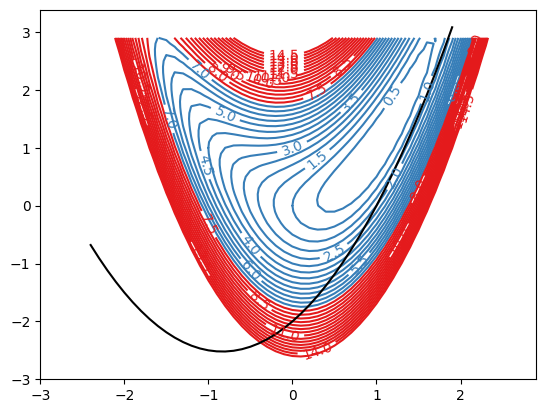

In [ ]:
from sympy import Symbol
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
dimention = 2
z = [Symbol('z_'+str(i+1)) for i in range(dimention)]
func = 2*(z[0]**2 - z[1])**2 + (z[0] - 1)**2
func2=3*z[0]**2/4 +5*z[0]/4 -2 - z[1]
X_0 = [-1,1]

def func_def(f):
    return lambda x: f.subs(list(zip(z,x)))
x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)

def func_def2(f):
    return lambda x: f.subs(list(zip(z,x)))
x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)


Z = np.ones((60,60))
X, Y = np.meshgrid(x, y)
for i in range(len(X)):
 for j in range(len(X[0])):
    Z[i][j]=func_def(func)([X[i][j], Y[i][j]])
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

x= np.arange(-2.4, 2.0, 0.1)
y = 3*x**2/4+5*x/4-2

plt.plot(x, y, "black")

plt.show()



7


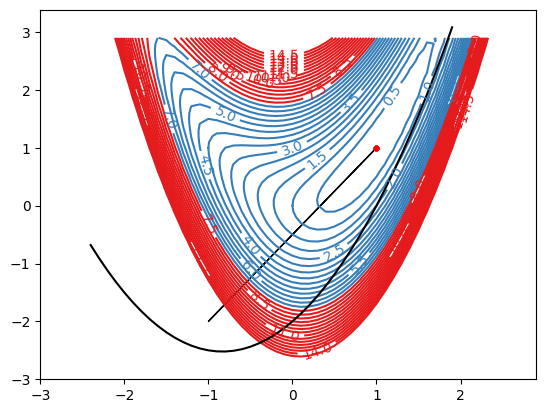

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)
x= np.arange(-2.4, 2.0, 0.1)
y = 3*x**2/4+5*x/4-2

plt.plot(x, y, "black")

#plt.show()

t_x = []
t_y = []

for i in unsv1:
    t_x.append(i[0])
    t_y.append(i[1])
#print(len(t_x))
for i in range(1,7,1):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")

  plt.scatter(t_x[i],t_y[i],s = 10,color = 'red')
plt.show()

7


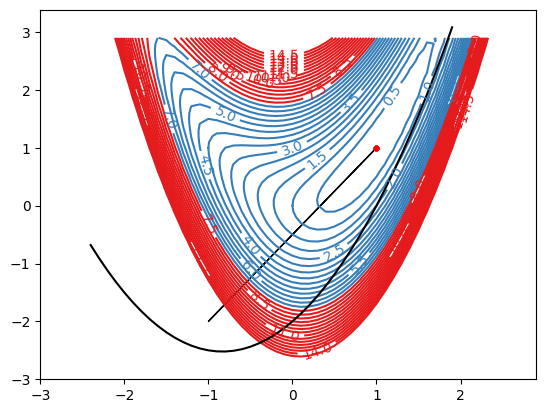

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)
x= np.arange(-2.4, 2.0, 0.1)
y = 3*x**2/4+5*x/4-2

plt.plot(x, y, "black")

#plt.show()

t_x = []
t_y = []

for i in unsv1:
    t_x.append(i[0])
    t_y.append(i[1])
print(len(t_x))
for i in range(1,7,1):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")

  plt.scatter(t_x[i],t_y[i],s = 10,color = 'red')
plt.show()

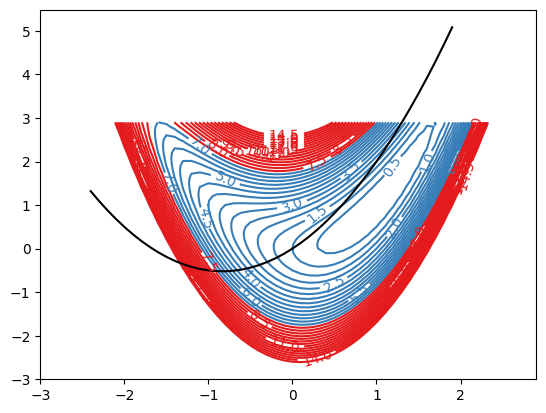

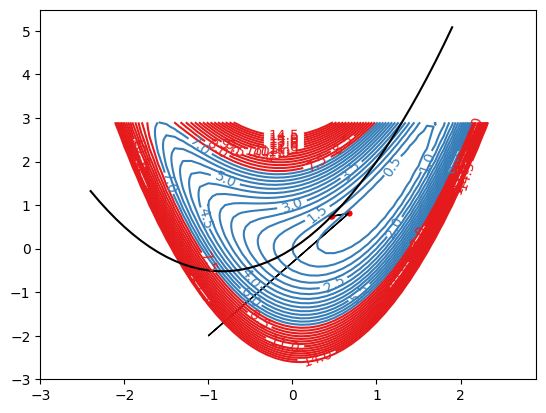

In [ ]:
from sympy import Symbol
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
dimention = 2
z = [Symbol('z_'+str(i+1)) for i in range(dimention)]
func = 2*(z[0]**2 - z[1])**2 + (z[0] - 1)**2
func2=3*z[0]**2/4 +5*z[0]/4 -2 - z[1]
X_0 = [-1,1]

def func_def(f):
    return lambda x: f.subs(list(zip(z,x)))
x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)

def func_def2(f):
    return lambda x: f.subs(list(zip(z,x)))
x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)


Z = np.ones((60,60))
X, Y = np.meshgrid(x, y)
for i in range(len(X)):
 for j in range(len(X[0])):
    Z[i][j]=func_def(func)([X[i][j], Y[i][j]])
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

x= np.arange(-2.4, 2.0, 0.1)
y = 3*x**2/4+5*x/4

plt.plot(x, y, "black")

plt.show()

cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)
x= np.arange(-2.4, 2.0, 0.1)
y = 3*x**2/4+5*x/4

plt.plot(x, y, "black")

#plt.show()

t_x = []
t_y = []

for i in unsv1:
    t_x.append(i[0])
    t_y.append(i[1])
#print(len(t_x))
for i in range(1,len(t_x),1):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")

  plt.scatter(t_x[i],t_y[i],s = 10,color = 'red')
plt.show()